# Your Title Here

**Name(s)**: Anna Doan, Jiya Makhija

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import plotly.express as px
pd.options.plotting.backend = 'plotly'

from dsc80_utils import * 

## Step 1: Introduction

In [2]:
# TODO

## Step 2: Data Cleaning and Exploratory Data Analysis

In [3]:
recipes = pd.read_csv("/Applications/ucsd/dsc80-2025-wi/projects/project04/RAW_recipes.csv")
interactions = pd.read_csv("/Applications/ucsd/dsc80-2025-wi/projects/project04/interactions.csv")

In [4]:
recipes[["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]] = recipes["nutrition"].str.extract(r"\[(.*)\]").iloc[:, 0].str.split(",", expand=True)
recipes[["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]] = recipes[["calories", "total_fat", "sugar", "sodium", "protein", "saturated_fat", "carbohydrates"]].astype(float)
recipes.drop(columns=["nutrition"], inplace=True)

recipes.head()

,name,id,minutes,contributor_id,...,sodium,protein,saturated_fat,carbohydrates
0,1 brownies in the world best ever,333281,40,985201,...,3.0,3.0,19.0,6.0
1,1 in canada chocolate chip cookies,453467,45,1848091,...,22.0,13.0,51.0,26.0
2,412 broccoli casserole,306168,40,50969,...,32.0,22.0,36.0,3.0
3,millionaire pound cake,286009,120,461724,...,13.0,20.0,123.0,39.0
4,2000 meatloaf,475785,90,2202916,...,12.0,29.0,48.0,2.0


In [5]:
interactions.head()

,user_id,recipe_id,date,rating,review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...


In [6]:
merged_df = recipes.merge(interactions, left_on="id", right_on="recipe_id", how="left")

In [7]:
merged_df

,name,id,minutes,contributor_id,...,recipe_id,date,rating,review
0,1 brownies in the world best ever,333281,40,985201,...,333281.0,2008-11-19,4.0,"These were pretty good, but took forever to ba..."
1,1 in canada chocolate chip cookies,453467,45,1848091,...,453467.0,2012-01-26,5.0,Originally I was gonna cut the recipe in half ...
2,412 broccoli casserole,306168,40,50969,...,306168.0,2008-12-31,5.0,This was one of the best broccoli casseroles t...
...,...,...,...,...,...,...,...,...,...
234426,cookies by design sugar shortbread cookies,298509,20,506822,...,298509.0,2008-06-19,1.0,This recipe tastes nothing like the Cookies by...
234427,cookies by design sugar shortbread cookies,298509,20,506822,...,298509.0,2010-02-08,5.0,"yummy cookies, i love this recipe me and my sm..."
234428,cookies by design sugar shortbread cookies,298509,20,506822,...,298509.0,2014-11-01,0.0,I work at a Cookies By Design and can say this...


In [8]:
merged_df['submitted'] = pd.to_datetime(merged_df['submitted'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [9]:
merged_df["rating"] = merged_df["rating"].replace(0, np.nan)

In [10]:
merged_df

,name,id,minutes,contributor_id,...,recipe_id,date,rating,review
0,1 brownies in the world best ever,333281,40,985201,...,333281.0,2008-11-19,4.0,"These were pretty good, but took forever to ba..."
1,1 in canada chocolate chip cookies,453467,45,1848091,...,453467.0,2012-01-26,5.0,Originally I was gonna cut the recipe in half ...
2,412 broccoli casserole,306168,40,50969,...,306168.0,2008-12-31,5.0,This was one of the best broccoli casseroles t...
...,...,...,...,...,...,...,...,...,...
234426,cookies by design sugar shortbread cookies,298509,20,506822,...,298509.0,2008-06-19,1.0,This recipe tastes nothing like the Cookies by...
234427,cookies by design sugar shortbread cookies,298509,20,506822,...,298509.0,2010-02-08,5.0,"yummy cookies, i love this recipe me and my sm..."
234428,cookies by design sugar shortbread cookies,298509,20,506822,...,298509.0,2014-11-01,NaN,I work at a Cookies By Design and can say this...


In [11]:
average_rating = merged_df.groupby("id")["rating"].mean()
merged_df = merged_df.merge(average_rating, on="id", how="left")
merged_df.rename(columns={"rating_y": "average_rating"}, inplace=True)

In [12]:
average_rating

id
275022    3.0
275024    3.0
275026    3.0
         ... 
537543    NaN
537671    NaN
537716    5.0
Name: rating, Length: 83782, dtype: float64

In [13]:
"""# computing average rating per recipe
avg_ratings = merged_df.groupby("id")["rating"].mean()
avg_ratings = avg_ratings.reset_index().rename(columns={"rating": "avg_rating"})
avg_ratings.head()"""

'# computing average rating per recipe\navg_ratings = merged_df.groupby("id")["rating"].mean()\navg_ratings = avg_ratings.reset_index().rename(columns={"rating": "avg_rating"})\navg_ratings.head()'

In [14]:
"""merged_df = merged_df.merge(avg_ratings, on="id", how="left")
merged_df.head()"""

'merged_df = merged_df.merge(avg_ratings, on="id", how="left")\nmerged_df.head()'

In [15]:
merged_df["ingredient_complexity"] = merged_df["n_ingredients"].apply(lambda x: "Simple (≤9)" if x <= 5 else "Complex (>9)")

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234429 entries, 0 to 234428
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   name                   234428 non-null  object        
 1   id                     234429 non-null  int64         
 2   minutes                234429 non-null  int64         
 3   contributor_id         234429 non-null  int64         
 4   submitted              234429 non-null  datetime64[ns]
 5   tags                   234429 non-null  object        
 6   n_steps                234429 non-null  int64         
 7   steps                  234429 non-null  object        
 8   description            234315 non-null  object        
 9   ingredients            234429 non-null  object        
 10  n_ingredients          234429 non-null  int64         
 11  calories               234429 non-null  float64       
 12  total_fat              234429 non-null  floa

In [17]:
import plotly.express as px


In [18]:
fig = px.histogram(merged_df, x="average_rating", nbins=20, title="Distribution of Average Recipe Ratings", color_discrete_sequence=["darkgreen"])
fig.show()

In [18]:
filtered_df = merged_df[merged_df["calories"] <= 1500]
fig = px.histogram(filtered_df, x="calories", nbins=40, title="Filtered (calories <= 1500) Distribution of Recipe Calories", color_discrete_sequence=["darkgreen"] )
fig.show()

In [19]:
merged_df.head()

,name,id,minutes,contributor_id,...,rating,review,average_rating,ingredient_complexity
0,1 brownies in the world best ever,333281,40,985201,...,4.0,"These were pretty good, but took forever to ba...",4.0,Complex (>9)
1,1 in canada chocolate chip cookies,453467,45,1848091,...,5.0,Originally I was gonna cut the recipe in half ...,5.0,Complex (>9)
2,412 broccoli casserole,306168,40,50969,...,5.0,This was one of the best broccoli casseroles t...,5.0,Complex (>9)
3,412 broccoli casserole,306168,40,50969,...,5.0,I made this for my son's first birthday party ...,5.0,Complex (>9)
4,412 broccoli casserole,306168,40,50969,...,5.0,Loved this. Be sure to completely thaw the br...,5.0,Complex (>9)


In [20]:
merged_df['protein']

0          3.0
1         13.0
2         22.0
          ... 
234426     4.0
234427     4.0
234428     4.0
Name: protein, Length: 234429, dtype: float64

In [21]:
merged_df["n_steps"].describe()

count    234429.00
mean         10.02
std           6.44
           ...    
50%           9.00
75%          13.00
max         100.00
Name: n_steps, Length: 8, dtype: float64

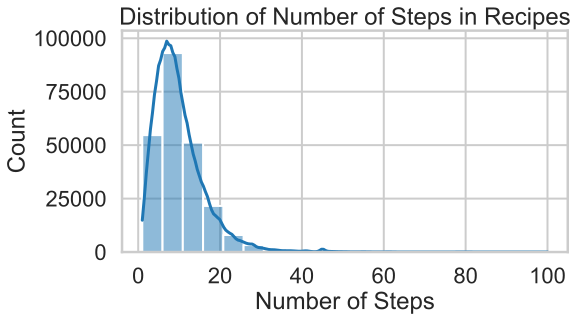

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(merged_df["n_steps"], bins=20, kde=True)
plt.title("Distribution of Number of Steps in Recipes")
plt.xlabel("Number of Steps")
plt.ylabel("Count")
plt.show()

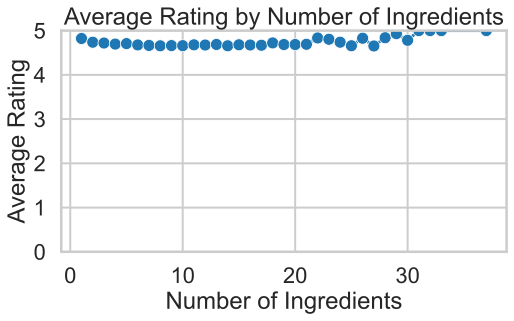

In [19]:
ingredient_rating = merged_df.groupby("n_ingredients")["average_rating"].mean()

plt.figure(figsize=(8, 4))
sns.lineplot(x=ingredient_rating.index, y=ingredient_rating.values, marker="o")
plt.title("Average Rating by Number of Ingredients")
plt.xlabel("Number of Ingredients")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.show()

## Step 3: Assessment of Missingness

In [22]:
merged_df['is_missing_rating'] = merged_df['rating_x'].isnull().astype(int)


In [23]:
merged_df.columns

Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'n_steps', 'steps', 'description', 'ingredients', 'n_ingredients',
       'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat',
       'carbohydrates', 'user_id', 'recipe_id', 'date', 'rating_x', 'review',
       'average_rating', 'ingredient_complexity', 'is_missing_rating'],
      dtype='object')

In [24]:
missing_values = merged_df.isnull().sum()


In [25]:
missing_data = missing_values[missing_values > 0].sort_values(ascending=False)
missing_data

rating_x          15036
average_rating     2777
description         114
                  ...  
user_id               1
recipe_id             1
date                  1
Length: 8, dtype: int64

In [34]:
merged_df['is_missing_rating']

0         0
1         0
2         0
         ..
234426    0
234427    0
234428    1
Name: is_missing_rating, Length: 234429, dtype: int64

In [30]:
from scipy.stats import ks_2samp


In [ ]:
def ks_test_missingness(df, test_columns, target_column="rating_x"):
    p_values = {}

    for col in test_columns:
        missing_group = df.loc[df[target_column].isna(), col].dropna()
        not_missing_group = df.loc[~df[target_column].isna(), col].dropna()

        if len(missing_group) > 0 and len(not_missing_group) > 0:
            ks_result = ks_2samp(missing_group, not_missing_group)
            p_values[col] = round(ks_result.pvalue,2)
        else:
            p_values[col] = None

    return pd.Series(p_values)

columns_to_test = ["calories","minutes","n_steps", "n_ingredients", "sugar", "submitted", "average_rating", "protein", "sodium", "saturated_fat", "carbohydrates"]

ks_results = ks_test_missingness(merged_df, columns_to_test)
print(ks_results)

calories         0.0
minutes          0.0
n_steps          0.0
                ... 
sodium           0.0
saturated_fat    0.0
carbohydrates    0.0
Length: 11, dtype: float64


In [36]:
def ks_test_missingness(df, test_columns, target_column="rating_x"):
    p_values = {}
    test_statistics = {}

    for col in test_columns:
        missing_group = df.loc[df[target_column].isna(), col].dropna()
        not_missing_group = df.loc[~df[target_column].isna(), col].dropna()

        if len(missing_group) > 0 and len(not_missing_group) > 0:
            ks_result = ks_2samp(missing_group, not_missing_group)
            p_values[col] = round(ks_result.pvalue, 5)  # More precise rounding
            test_statistics[col] = round(ks_result.statistic, 5)  # Capture KS statistic
        else:
            p_values[col] = None
            test_statistics[col] = None

    return pd.DataFrame({"KS_Statistic": test_statistics, "P-Value": p_values})

# Run KS test
ks_results = ks_test_missingness(merged_df, columns_to_test)
print(ks_results)

               KS_Statistic  P-Value
calories               0.05      0.0
minutes                0.09      0.0
n_steps                0.07      0.0
...                     ...      ...
sodium                 0.03      0.0
saturated_fat          0.05      0.0
carbohydrates          0.04      0.0

[11 rows x 2 columns]


In [ ]:
# TODO

## Step 4: Hypothesis Testing

In [ ]:
# TODO

## Step 5: Framing a Prediction Problem

In [ ]:
# TODO

## Step 6: Baseline Model

In [ ]:
# TODO

## Step 7: Final Model

In [ ]:
# TODO

## Step 8: Fairness Analysis

In [ ]:
# TODO